In [2]:
#libraries needed
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.set_printoptions(precision=5, suppress=True)

In [3]:
#load the MPIA data

MPIA_data = pd.read_excel("MPIAssignment.xlsx")
MPIA_data = MPIA_data.iloc[:,:12]
MPIA_data.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159


In [4]:
numeric_colummns = ['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity','mpi']
MPIA_data[numeric_colummns].describe()

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
count,416.000000,416.000000,416.000000,416.000000,416.000000
mean,37.518715,28189.257212,0.379875,0.444382,0.170344
std,86.915931,10998.628426,0.116088,0.017566,0.055538
min,0.600450,7649.000000,0.047000,0.381000,0.018000
25%,3.289344,20813.750000,0.322750,0.434000,0.141000
50%,7.111642,26402.000000,0.393000,0.444000,0.173000
75%,20.087663,32761.750000,0.457250,0.456000,0.205250
max,597.629226,74297.000000,0.728000,0.494000,0.359000


nightlight_sum
landscan_pop
mpi_headcount
mpi_intensity
mpi


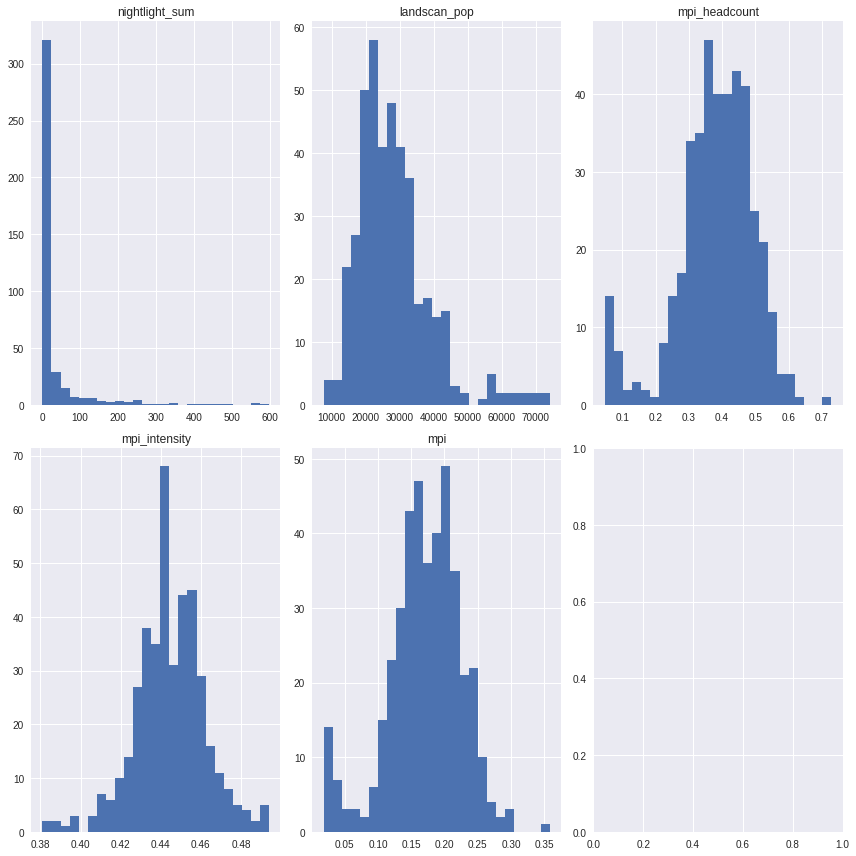

In [5]:
#histograms of all features
fig, axes = plt.subplots(2, 3, figsize=(12,12))
axes = axes.ravel()

for index,ax in enumerate(axes):
    
    print(numeric_colummns[index])
    ax.hist(MPIA_data[numeric_colummns[index]],bins=25)
    ax.set_title(numeric_colummns[index])
    if index==4:
        break

plt.tight_layout()

No handles with labels found to put in legend.


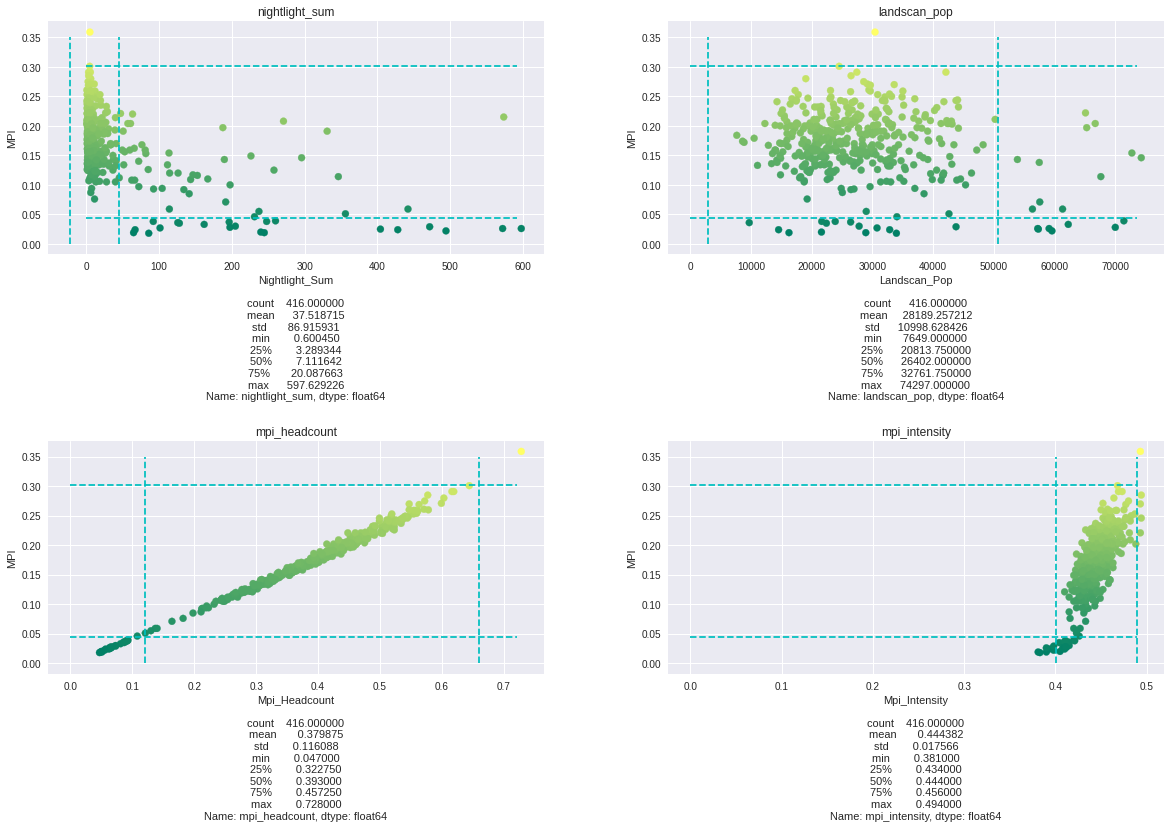

In [6]:
#scatter plots of MPI and other features
fig, axes = plt.subplots(2, 2, figsize=(20,12))
axes = axes.ravel()

for index,ax in enumerate(axes):
    ax.scatter(x=MPIA_data[numeric_colummns[index]],y=MPIA_data[numeric_colummns[4]],c=MPIA_data[numeric_colummns[4]],cmap='summer')

    IQR_x = MPIA_data[numeric_colummns[index]].quantile(0.75)-MPIA_data[numeric_colummns[index]].quantile(0.25)
    lower_bound_x = MPIA_data[numeric_colummns[index]].quantile(0.25)-1.5*IQR_x
    lower_x1 = np.ones(36)*lower_bound_x
    lower_y1 = np.array(range(36))/100
    ax.plot(lower_x1,lower_y1,c='c',ls='--')

    upper_bound_x = MPIA_data[numeric_colummns[index]].quantile(0.75)+1.5*IQR_x
    upper_x2 = np.ones(36)*upper_bound_x
    upper_y2 = np.array(range(36))/100
    ax.plot(upper_x2,upper_y2,c='c',ls='--')

    IQR_y = MPIA_data[numeric_colummns[4]].quantile(0.75)-MPIA_data[numeric_colummns[4]].quantile(0.25)
    lower_bound_y = MPIA_data[numeric_colummns[4]].quantile(0.25)-1.5*IQR_y
    param = MPIA_data[numeric_colummns[index]].max()/100
    lower_x3 = np.array(range(100))*param
    lower_y3 = np.ones(100)*lower_bound_y
    ax.plot(lower_x3,lower_y3,c='c',ls='--')

    upper_bound_y = MPIA_data[numeric_colummns[4]].quantile(0.75)+1.5*IQR_y
    upper_x4 = np.array(range(100))*param
    upper_y4 = np.ones(100)*upper_bound_y
    ax.plot(upper_x4,upper_y4,c='c',ls='--')

    ax.set_title(numeric_colummns[index])
    ax.set_xlabel(f"{numeric_colummns[index].title()}\n\n{MPIA_data.describe()[numeric_colummns[index]]}")
    ax.set_ylabel("MPI")

plt.subplots_adjust(wspace=0.25, hspace=0.8)
plt.legend(loc='upper left')

In [7]:
#correlations
MPIA_data2 = MPIA_data[numeric_colummns]
for col in numeric_colummns:
    new_col = 'log_'+col
    MPIA_data2[new_col] = MPIA_data2[col].apply(np.log)

#print(MPIA_data2.head())
corr1 = MPIA_data2[numeric_colummns].corr()['mpi']
corr2 = MPIA_data2[['log_nightlight_sum','log_landscan_pop','log_mpi_headcount','log_mpi_intensity','mpi']].corr()['mpi']
corr3 = MPIA_data2[['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity','log_mpi']].corr()['log_mpi']
corr4 = MPIA_data2[['log_nightlight_sum','log_landscan_pop','log_mpi_headcount','log_mpi_intensity','log_mpi']].corr()['log_mpi']
dict = {
    'X vs y': corr1.values,
    'log_X vs y': corr2.values,
    'X vs log_Y': corr3.values,
    'log_X vs log_Y': corr4.values
}
corr_df = pd.DataFrame(dict,index=numeric_colummns[:5])
corr_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,X vs y,log_X vs y,X vs log_Y,log_X vs log_Y
nightlight_sum,-0.528349,-0.575816,-0.638927,-0.617078
landscan_pop,-0.172782,-0.113587,-0.223342,-0.160110
mpi_headcount,0.995378,0.922131,0.942200,0.998507
mpi_intensity,0.799883,0.803473,0.769113,0.781876
mpi,1.000000,1.000000,1.000000,1.000000


In [8]:
rw_nightlight = pd.read_excel("rw_nightlight_2015_07.xlsx")
rw_nightlight.head()

,OBJECTID,FID,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,1,0,5,0.000086,14.889998,26.718889,11.828891,20.259440,4.263810,101.297202
1,2,1,110,0.001903,0.130136,3.134233,3.004097,0.773277,0.607997,85.060422
2,3,2,137,0.002370,0.156065,6.990618,6.834553,0.978038,0.950469,133.991142
3,4,3,16,0.000277,2.069596,24.918432,22.848836,10.120813,6.568677,161.933015
4,5,4,248,0.004290,0.000000,1.451542,1.451542,0.199257,0.184615,49.415699


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


nightlight_per_capita
population_density
mpi


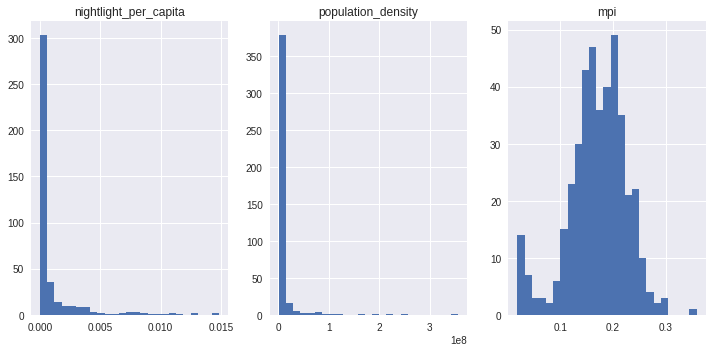

In [9]:
#construct new features
MPIA_data3 = MPIA_data[numeric_colummns]
MPIA_data3['nightlight_per_capita'] = MPIA_data3['nightlight_sum']/MPIA_data3['landscan_pop']
MPIA_data3['population_density'] = MPIA_data3['landscan_pop']/rw_nightlight['AREA']

new_features = ['nightlight_per_capita','population_density','mpi']
fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes = axes.ravel()

for index,ax in enumerate(axes):
    
    print(new_features[index])
    ax.hist(MPIA_data3[new_features[index]],bins=25)
    ax.set_title(new_features[index])

plt.tight_layout()

In [10]:
#correlations again
for col in new_features:
    new_col = 'log_'+col
    MPIA_data3[new_col] = MPIA_data3[col].apply(np.log)

#print(MPIA_data2.head())
corr1 = MPIA_data3[new_features].corr()['mpi']
corr2 = MPIA_data3[['log_nightlight_per_capita','log_population_density','mpi']].corr()['mpi']
corr3 = MPIA_data3[['nightlight_per_capita','population_density','log_mpi']].corr()['log_mpi']
corr4 = MPIA_data3[['log_nightlight_per_capita','log_population_density','log_mpi']].corr()['log_mpi']
dict = {
    'X vs y': corr1.values,
    'log_X vs y': corr2.values,
    'X vs log_Y': corr3.values,
    'log_X vs log_Y': corr4.values
}
corr_df = pd.DataFrame(dict,index=new_features[:3])
corr_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,X vs y,log_X vs y,X vs log_Y,log_X vs log_Y
nightlight_per_capita,-0.546978,-0.605358,-0.660497,-0.638304
population_density,-0.487136,-0.617437,-0.668281,-0.745331
mpi,1.000000,1.000000,1.000000,1.000000


Since during the modelling part, we need to use regressors module and it does not work in my windows 10 machine. I used colab instead.

In [1]:
%pip install regressors

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=d552142dd4bab2a2e4959bc6e6251b4673310fcd655de1c467a71a1e7f842ed2
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [27]:
#build the model
train_data = MPIA_data3[['nightlight_per_capita','log_population_density','log_mpi']]

import scipy
from regressors import stats
import statsmodels.api as sm
from sklearn import linear_model

#backward stepwise
'''
reference: https://github.com/AakkashVijayakumar/stepwise-regression
Based on p-value from statsmodels.api.OLS Arguments: 
X - pandas.DataFrame with candidate features 
y - list-like with the target 
threshold_out - exclude a feature if its p-value > threshold_out 
verbose - whether to print the sequence of inclusions and exclusions 
Returns: list of selected features
'''
def backward_regression(X, y, threshold_out, verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X = MPIA_data3[['nightlight_per_capita','log_population_density']]
y = MPIA_data3['log_mpi']
bw_regressor_features = backward_regression(X, y, 0.05)
print(bw_regressor_features)  #we can find that both features are significant and all can be used in linear regression.

regression = linear_model.LinearRegression()  
regression.fit(X,y)

#pass the trained model, the dependent, independent variable and it will return the pvalues for each feature.
print(stats.summary(regression, X,y))

#overall p-values for the model
#pass the model predictions and the actual values 
predicted_rg = regression.predict(X)
print(scipy.stats.ttest_ind(predicted_rg, y, equal_var=False))

['nightlight_per_capita', 'log_population_density']
Residuals:
    Min      1Q  Median     3Q    Max
-0.8547 -0.1593 -0.0079 0.1586 0.8943


Coefficients:
             Estimate  Std. Error   t value  p value
_intercept   3.988622    0.272350   14.6452      0.0
x1         -92.061800    6.433176  -14.3105      0.0
x2          -0.363792    0.001916 -189.9180      0.0
---
R-squared:  0.70212,    Adjusted R-squared:  0.70067
F-statistic: 486.72 on 2 features
None
Ttest_indResult(statistic=2.82176283038368e-14, pvalue=0.9999999999999776)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
#try another function in python for backward regression
inputDF = MPIA_data3[['nightlight_per_capita','log_population_density']]
outputDF = MPIA_data3['log_mpi']

import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
backwardModel = sfs(linear_model.LinearRegression(),k_features=2,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
backwardModel.fit(inputDF,outputDF)
print(backwardModel.k_feature_names_) 

# we can see though this backward selection is measured using R squared value, both features are still significant, which can cross validates the significance of the features.

#apply linear regression
import patsy
my_formula = "log_mpi~nightlight_per_capita + log_population_density" 
y, X = patsy.dmatrices(my_formula, MPIA_data3)
LR = sm.OLS(y,X).fit()
print(LR.summary())

('nightlight_per_capita', 'log_population_density')
                            OLS Regression Results                            
Dep. Variable:                log_mpi   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     486.7
Date:                Mon, 02 May 2022   Prob (F-statistic):          2.46e-109
Time:                        09:44:14   Log-Likelihood:                -42.884
No. Observations:                 416   AIC:                             91.77
Df Residuals:                     413   BIC:                             103.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [32]:
# ridge regression
from sklearn.linear_model import Ridge, RidgeCV
X = MPIA_data3[['nightlight_per_capita','log_population_density']]
y = MPIA_data3['log_mpi']

alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X, y)
print(ridgecv.alpha_)

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X, y)
predicted_ridge = ridge.predict(X)
print(pd.Series(ridge.coef_, index = X.columns)) # Print coefficients

#print out p-values for all features
print(stats.summary(ridge, X, y))

#overall p-values for the model
print(scipy.stats.ttest_ind(predicted_ridge, y, equal_var=False))

0.01155064850041579
nightlight_per_capita    -91.501792
log_population_density    -0.360320
dtype: float64
Residuals:
    Min      1Q  Median     3Q    Max
-0.8539 -0.1572 -0.0088 0.1572 0.8928


Coefficients:
             Estimate  Std. Error   t value  p value
_intercept   3.933190    0.272372   14.4405      0.0
x1         -91.501792    6.433691  -14.2223      0.0
x2          -0.360320    0.001916 -188.0905      0.0
---
R-squared:  0.70207,    Adjusted R-squared:  0.70063
F-statistic: 486.61 on 2 features
None
Ttest_indResult(statistic=2.8312808720483414e-14, pvalue=0.9999999999999774)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(

In [39]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

alphas = np.logspace(-3, 2, 50)
l1_ratios =[.1, .5, .7, .95,  1]
en_CV = ElasticNetCV(alphas = alphas, l1_ratio=l1_ratios, cv=5, random_state=0, normalize = True)
en_CV.fit(X, y)
print(en_CV.alpha_,en_CV.l1_ratio_)

en = ElasticNet(alpha = en_CV.alpha_, l1_ratio=en_CV.l1_ratio_, random_state=0, normalize = True)
en.fit(X, y)
predicted_en = en.predict(X)
print(pd.Series(en.coef_, index = X.columns)) # Print coefficients

#print out p-values for all features
print(stats.summary(en, X, y))

#overall p-values for the model
print(scipy.stats.ttest_ind(predicted_en, y, equal_var=False))

0.001 1.0
nightlight_per_capita    -85.685967
log_population_density    -0.345077
dtype: float64
Residuals:
    Min      1Q  Median     3Q    Max
-0.8046 -0.1633 -0.0015 0.1539 0.8845


Coefficients:
             Estimate  Std. Error   t value  p value
_intercept   3.686123    0.273456   13.4797      0.0
x1         -85.685967    6.459312  -13.2655      0.0
x2          -0.345077    0.001923 -179.4189      0.0
---
R-squared:  0.69969,    Adjusted R-squared:  0.69824
F-statistic: 481.12 on 2 features
None
Ttest_indResult(statistic=3.6128464153610276e-14, pvalue=0.9999999999999711)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

In [34]:
#elastic nets
from sklearn.linear_model import ElasticNetCV
ElasticNet = ElasticNetCV(cv=5,  normalize=True)
ElasticNet.fit(X,y)

predicted_en = ElasticNet.predict(X)
#print out p-values for all features
print(stats.summary(ElasticNet, X, y))

#overall p-values for the model
print(scipy.stats.ttest_ind(predicted_en, y, equal_var=False))

Residuals:
    Min      1Q  Median     3Q    Max
-0.8534 -0.1583 -0.0086 0.1577 0.8931


Coefficients:
             Estimate  Std. Error   t value  p value
_intercept   3.947197    0.272363   14.4924      0.0
x1         -91.586825    6.433484  -14.2360      0.0
x2          -0.361201    0.001916 -188.5565      0.0
---
R-squared:  0.70209,    Adjusted R-squared:  0.70064
F-statistic: 486.66 on 2 features
None
Ttest_indResult(statistic=2.1218629459108604e-14, pvalue=0.9999999999999831)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


In [40]:
#Lasso model
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso = Lasso(alpha=lassocv.alpha_, max_iter = 10000, normalize = True)
lasso.fit(X, y)
print(pd.Series(lasso.coef_, index=X.columns))

predicted_lasso = lasso.predict(X)
#print out p-values for all features
print(stats.summary(lasso, X, y))

#overall p-values for the model
print(scipy.stats.ttest_ind(predicted_lasso, y, equal_var=False))

nightlight_per_capita    -91.948828
log_population_density    -0.363454
dtype: float64
Residuals:
    Min      1Q  Median     3Q    Max
-0.8538 -0.1593  -0.008 0.1585 0.8941


Coefficients:
             Estimate  Std. Error   t value  p value
_intercept   3.983160    0.272350   14.6251      0.0
x1         -91.948828    6.433185  -14.2929      0.0
x2          -0.363454    0.001916 -189.7413      0.0
---
R-squared:  0.70212,    Adjusted R-squared:  0.70067
F-statistic: 486.72 on 2 features
None
Ttest_indResult(statistic=0.0, pvalue=1.0)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

In [42]:
y_actual = np.array(y)
print(np.corrcoef(predicted_lasso,y_actual))

[[1.      0.83792]
 [0.83792 1.     ]]


In [44]:
MPIA_data['estimated_mpi'] = np.exp(predicted_lasso)
MPIA_data.head()

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi,estimated_mpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027,0.030937
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126,0.101829
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092,0.092484
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033,0.038941
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159,0.157705


In [47]:
MPIA_data['log_estimated_mpi'] = predicted_lasso
MPIA_data['log_mpi']=np.log(MPIA_data['mpi'])
MPIA_data.head()

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi,estimated_mpi,log_estimated_mpi,log_mpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027,0.030937,-3.475818,-3.611918
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126,0.101829,-2.284464,-2.071473
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092,0.092484,-2.380714,-2.385967
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033,0.038941,-3.245705,-3.411248
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159,0.157705,-1.847030,-1.838851


In [50]:
MPIA_data.to_excel("MPIAssignment2.xlsx",index=None)